<a href="https://colab.research.google.com/github/rishitharaj/Diabetes-Prediction-using-CDC-BRFSS-Data/blob/main/Diabetes_EDA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA - Diabetes (Balanced) Health Indicators (BRFSS2015)

This notebook contains the exploratory data analysis performed on the Balanced Dataset of the CDC - https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators  

It includes: basic data info, class distribution, numeric summaries, histograms, correlation matrices, boxplots for key features, and a sampled scatter matrix.

## About Columns of the Dataset :

- Diabetes_binary : you have diabetes (0,1)
- HighBP : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)
- HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)
- CholCheck : Cholesterol check within past five years (0,1)
- BMI : Body Mass Index (BMI)
- Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)
- Stroke : (Ever told) you had a stroke. (0,1)
- HeartDiseaseorAttack : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)
- PhysActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)
- Fruits : Consume Fruit 1 or more times per day (0,1)
- Veggies : Consume Vegetables 1 or more times per day (0,1)
- HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)
- AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as = - Medicare, or Indian Health Service? (0,1)
- NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)
- GenHlth : Would you say that in general your health is: rate (1 ~ 5)
- MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)
- PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)
- DiffWalk : Do you have serious difficulty walking or climbing stairs? (0,1)
- Sex : Indicate sex of respondent (0,1) (Female or Male)
- Age : Fourteen-level age category (1 ~ 14)
- Education : What is the highest grade or year of school you completed? (1 ~ 6)
- Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

In [ ]:
!pip install ydata-profiling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

# Path to CSV - update if needed
path = "/content/drive/MyDrive/Assignments/Mini Project/Balanced Dataset/diabetes_binary_health_indicators_BRFSS2015.csv"

df = pd.read_csv(path)
print('Loaded', df.shape, 'rows,columns')
df.head()


Loaded (253680, 22) rows,columns


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [85]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(
#     df,
#     title="CDC Diabetes Dataset - Profiling Report",
#     explorative=True
# )

# profile

In [ ]:

# Basic info & missing values
basic_info = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "n_unique": df.nunique(),
    "n_missing": df.isna().sum(),
    "pct_missing": (df.isna().mean() * 100).round(3)
})
basic_info


,dtype,n_unique,n_missing,pct_missing
Diabetes_binary,float64,2,0,0.0
HighBP,float64,2,0,0.0
HighChol,float64,2,0,0.0
CholCheck,float64,2,0,0.0
BMI,float64,84,0,0.0
Smoker,float64,2,0,0.0
Stroke,float64,2,0,0.0
HeartDiseaseorAttack,float64,2,0,0.0
PhysActivity,float64,2,0,0.0
Fruits,float64,2,0,0.0


Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


Text(0, 0.5, 'Count')

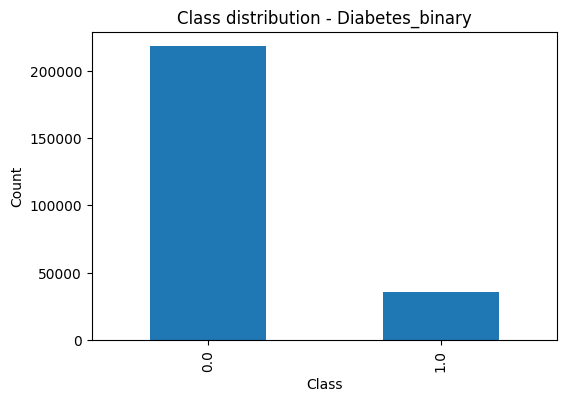

In [ ]:
# Class balance
class_counts = df['Diabetes_binary'].value_counts().sort_index()
print(class_counts)
ax = class_counts.plot(kind='bar', title='Class distribution - Diabetes_binary', figsize=(6,4))
ax.set_xlabel('Class'); ax.set_ylabel('Count')


In [ ]:

# Numeric summary
numeric_desc = df.describe().T
numeric_desc


,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


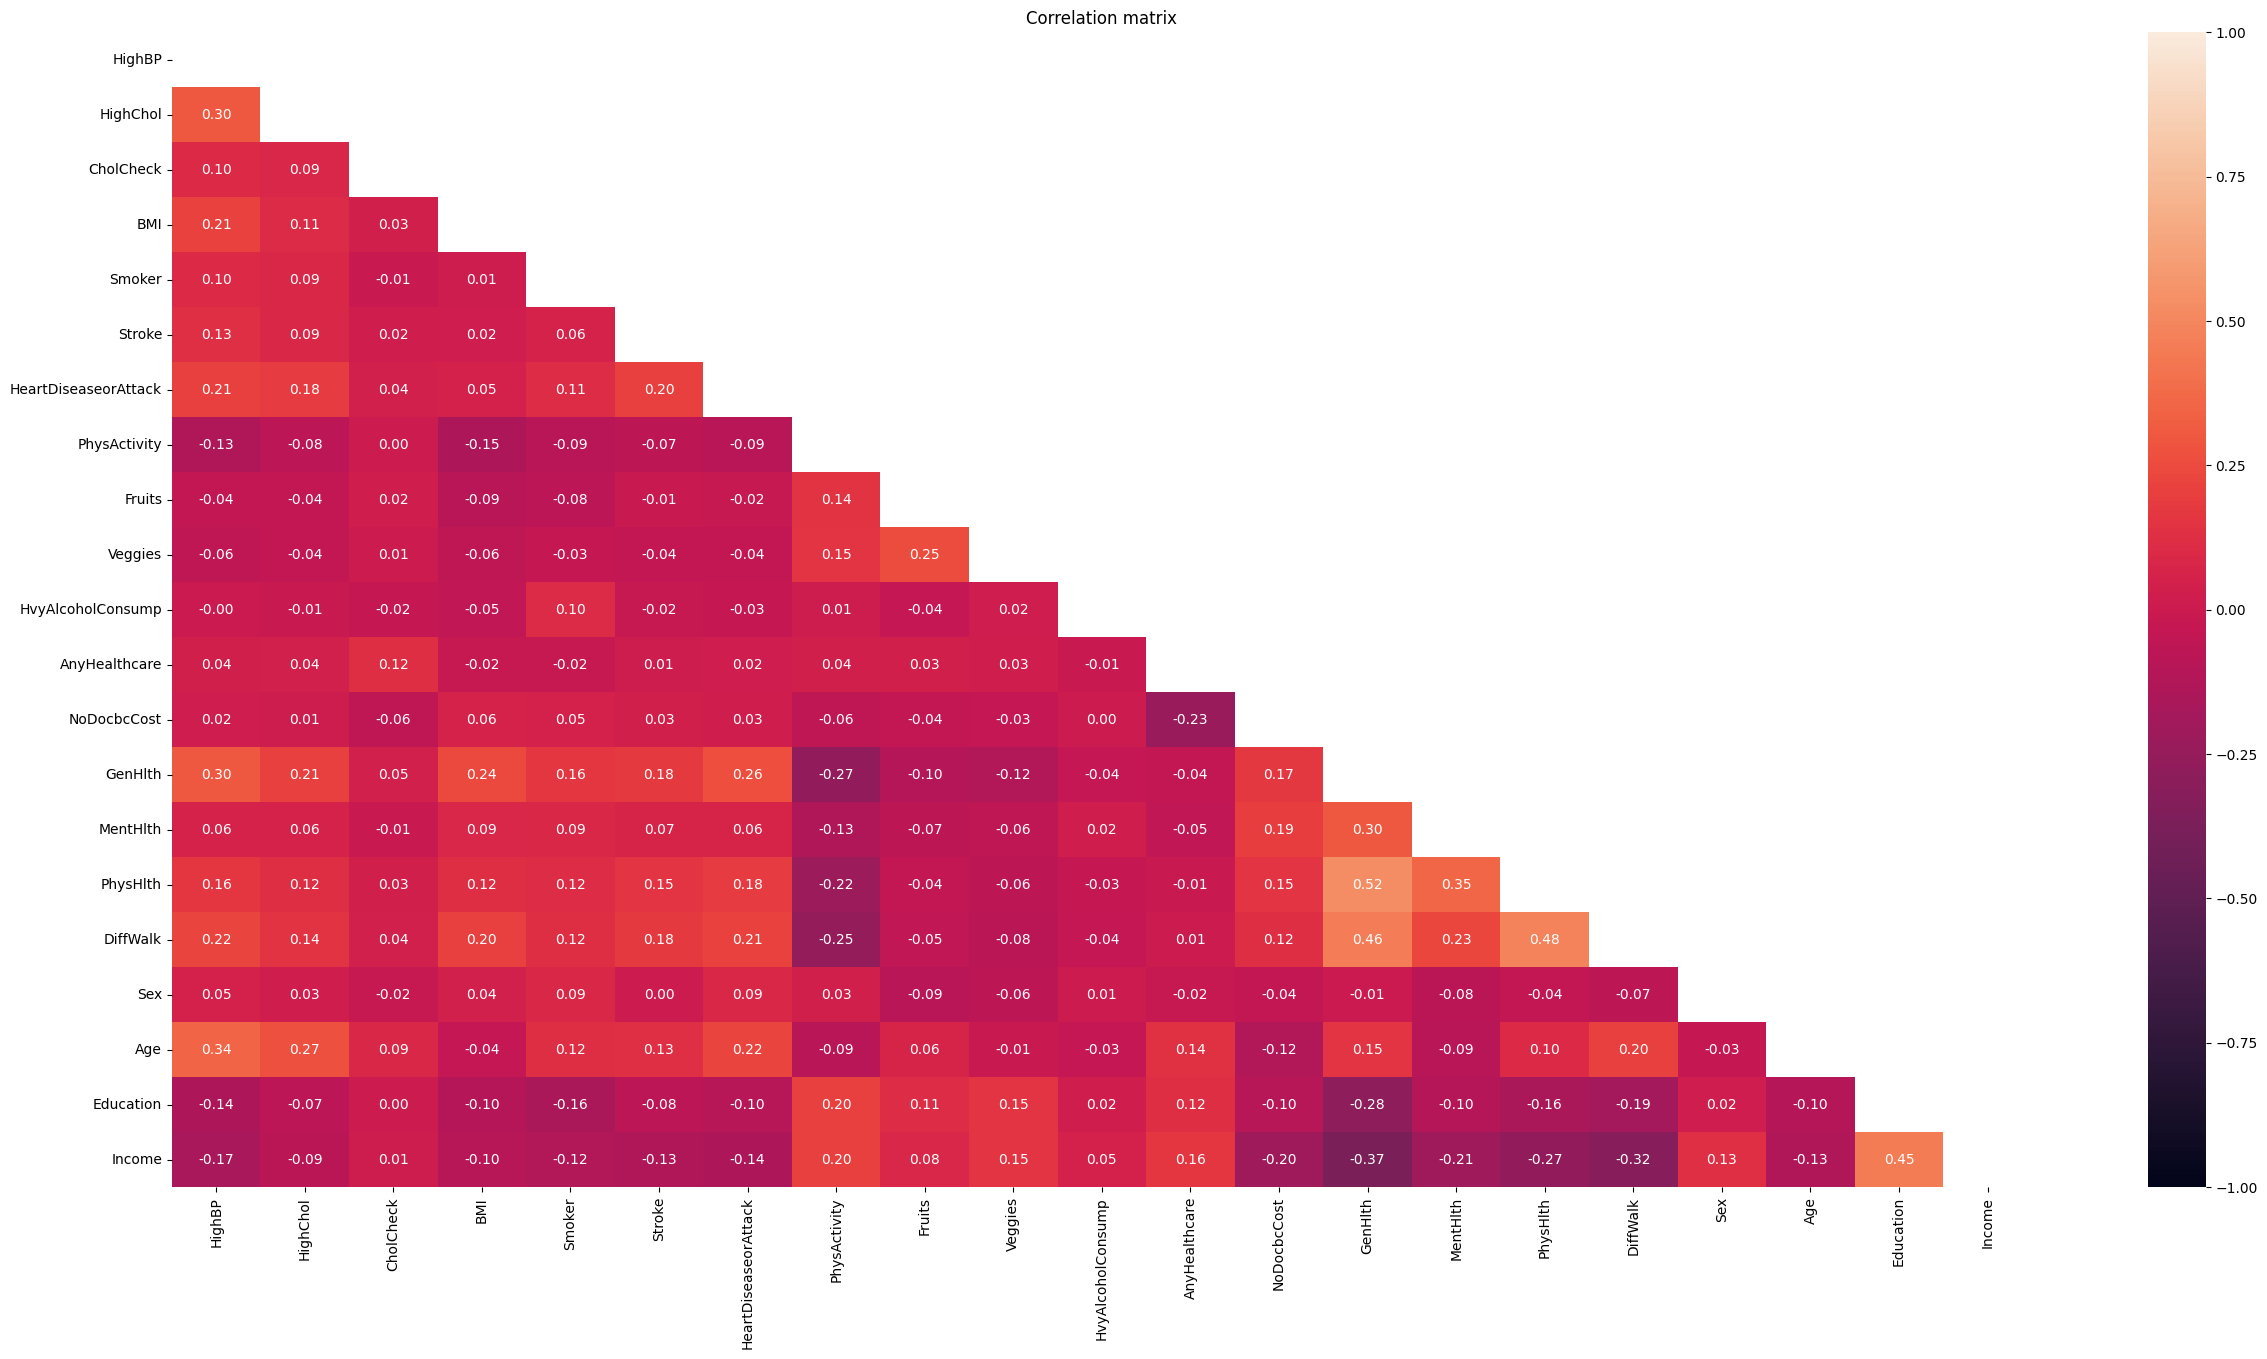

In [ ]:
# Correlation matrix

plt.figure(figsize=(30,15))
num_df = df.select_dtypes(include=[np.number]).drop(columns=['Diabetes_binary'])
corr = num_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

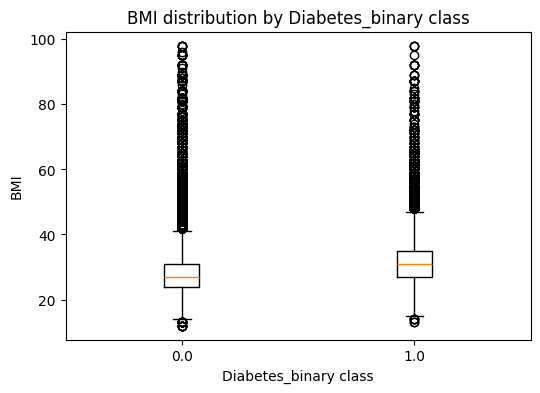

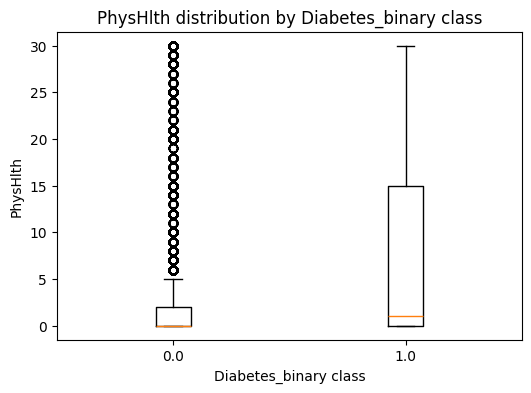

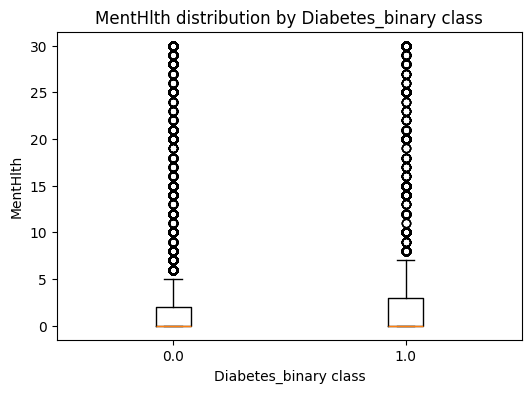

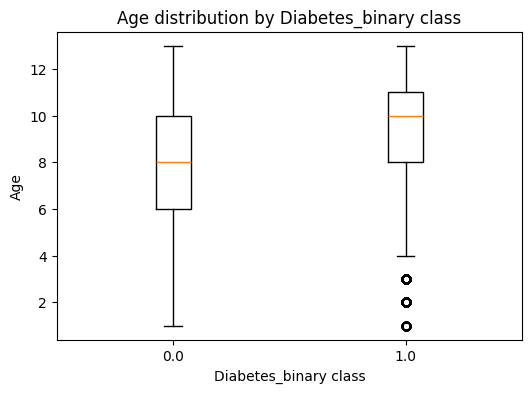

In [ ]:

# Boxplots for key continuous features by class
key_features = ['BMI', 'PhysHlth', 'MentHlth', 'Age']
for feat in key_features:
    if feat in df.columns:
        plt.figure(figsize=(6,4))
        data_to_plot = [df.loc[df['Diabetes_binary']==cls, feat].dropna() for cls in sorted(df['Diabetes_binary'].unique())]
        plt.boxplot(data_to_plot, tick_labels=[str(x) for x in sorted(df['Diabetes_binary'].unique())])
        plt.title(f"{feat} distribution by Diabetes_binary class")
        plt.xlabel("Diabetes_binary class")
        plt.ylabel(feat)
        plt.show()


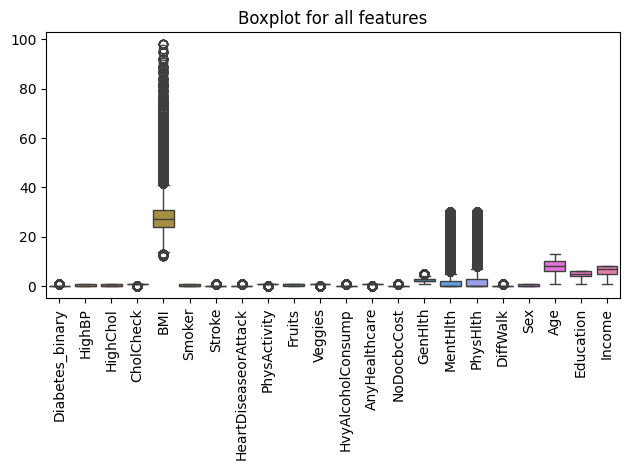

In [ ]:
sns.boxplot(data=df)
plt.title("Boxplot for all features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

# Value counts for binary-like features
binary_like = [c for c in df.columns if df[c].dropna().isin([0,1]).all() and c!='Diabetes_binary']
binary_counts = {c: df[c].value_counts().to_dict() for c in binary_like}
pd.DataFrame([{ "feature": k, **v } for k,v in binary_counts.items()])


,feature,0.0,1.0
0,HighBP,144851,108829
1,HighChol,146089,107591
2,CholCheck,9470,244210
3,Smoker,141257,112423
4,Stroke,243388,10292
5,HeartDiseaseorAttack,229787,23893
6,PhysActivity,61760,191920
7,Fruits,92782,160898
8,Veggies,47839,205841
9,HvyAlcoholConsump,239424,14256


In [ ]:
!pip install lightgbm catboost imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import matplotlib.pyplot as plt
from collections import OrderedDict

X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"].astype(int)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.20, stratify=y, random_state=42
# )

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,        # preserves original imbalance
    random_state=42
)


In [ ]:
print("Train (before balancing):")
print(y_train_full.value_counts(normalize=True))

print("\nTest (unbalanced, real-world):")
print(y_test.value_counts(normalize=True))


Train (before balancing):
Diabetes_binary
0    0.860666
1    0.139334
Name: proportion, dtype: float64

Test (unbalanced, real-world):
Diabetes_binary
0    0.860671
1    0.139329
Name: proportion, dtype: float64


In [ ]:
from sklearn.utils import resample
import pandas as pd

# Combine X and y temporarily
train_df = pd.concat([X_train_full, y_train_full], axis=1)

# Separate classes
majority = train_df[train_df.Diabetes_binary == 0]
minority = train_df[train_df.Diabetes_binary == 1]

# Always sample to the MIN class size
n_samples = min(len(majority), len(minority))

majority_balanced = resample(
    majority,
    replace=False,
    n_samples=n_samples,
    random_state=42
)

minority_balanced = resample(
    minority,
    replace=False,
    n_samples=n_samples,
    random_state=42
)

# Final balanced training set
train_balanced = pd.concat([majority_balanced, minority_balanced]) \
                    .sample(frac=1, random_state=42)  # shuffle


In [ ]:
X_train = train_balanced.drop(columns="Diabetes_binary")
y_train = train_balanced["Diabetes_binary"]


In [ ]:
print("Final TRAIN distribution (balanced):")
print(y_train.value_counts(normalize=True))

print("\nFinal TEST distribution (unbalanced):")
print(y_test.value_counts(normalize=True))


Final TRAIN distribution (balanced):
Diabetes_binary
0    0.5
1    0.5
Name: proportion, dtype: float64

Final TEST distribution (unbalanced):
Diabetes_binary
0    0.860671
1    0.139329
Name: proportion, dtype: float64


In [ ]:
# # Sanity checks to ensure correct data split

assert abs(y_train.value_counts(normalize=True)[0] - 0.5) < 0.01
assert abs(y_train.value_counts(normalize=True)[1] - 0.5) < 0.01

assert y_test.value_counts(normalize=True)[0] > 0.80
assert y_test.value_counts(normalize=True)[1] < 0.20


In [ ]:
from sklearn.compose import ColumnTransformer # ColumnTransformer for preprocessing numeric features

numeric_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ]
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [ ]:
from sklearn.linear_model import LogisticRegression

baseline = LogisticRegression(max_iter=2000, random_state=42)
baseline.fit(X_train, y_train)

y_proba_base = baseline.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

print("Baseline ROC AUC:", roc_auc_score(y_test, y_proba_base))
print("Baseline PR AUC :", average_precision_score(y_test, y_proba_base))


Baseline ROC AUC: 0.819452164857686
Baseline PR AUC : 0.39236338992838427


**Note:** *A logistic regression baseline achieved an ROC AUC of 0.82, confirming strong linear separability. This provided a reliable benchmark against which more complex ensemble models are evaluated.*

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "Logistic": LogisticRegression(max_iter=2000, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=300),
    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMClassifier(n_estimators=300, learning_rate=0.05, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, verbose=0, random_state=42)
}


In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, recall_score
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "ROC_AUC": roc_auc_score(y_test, y_proba),
        "PR_AUC": average_precision_score(y_test, y_proba),
        "Recall_Diabetes": recall_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False)
results_df


[LightGBM] [Info] Number of positive: 28277, number of negative: 28277
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 56554, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,ROC_AUC,PR_AUC,Recall_Diabetes
5,CatBoost,0.827166,0.422264,0.794738
3,XGBoost,0.826698,0.420693,0.791767
2,GradientBoosting,0.826461,0.419375,0.789221
4,LightGBM,0.825885,0.418507,0.794313
0,Logistic,0.819452,0.392363,0.762767
1,RandomForest,0.807671,0.380108,0.774791


Multiple baseline and ensemble models were evaluated using ROC AUC, PR AUC, and recall on an unbalanced test set. CatBoost achieved the best overall performance, with the highest ROC AUC (0.827) and PR AUC (0.422), and was selected as the final model.

The marginal improvement over logistic regression indicates strong linear separability in the dataset, with limited but meaningful gains from modeling non-linear interactions.

In [ ]:
from sklearn.metrics import precision_recall_curve
import pandas as pd

cat = models["CatBoost"]
cat.fit(X_train, y_train)

y_proba = cat.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

df_thresh = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1]
})

df_thresh[df_thresh["recall"] >= 0.85].head()


,threshold,precision,recall
0,0.000496,0.139329,1.0
1,0.000545,0.139332,1.0
2,0.000588,0.139335,1.0
3,0.000704,0.139340,1.0
4,0.000818,0.139343,1.0


In [ ]:
# Ignore extreme thresholds
df_valid = df_thresh[df_thresh["threshold"] > 0.05]

# Show good trade-offs
df_valid.sort_values(["recall", "precision"], ascending=False).head(10)


,threshold,precision,recall
6357,0.050177,0.162183,0.996039
6356,0.050176,0.162179,0.996039
6355,0.050176,0.162175,0.996039
6354,0.050160,0.162171,0.996039
6353,0.050155,0.162145,0.996039
6352,0.050141,0.162142,0.996039
6351,0.050112,0.162138,0.996039
6350,0.050095,0.162134,0.996039
6349,0.050091,0.162130,0.996039
6348,0.050090,0.162127,0.996039


In [ ]:
df_valid = df_thresh[df_thresh["threshold"] > 0.05]

recall_target = 0.80

candidates = (
    df_valid[df_valid["recall"] >= recall_target]
    .sort_values("precision", ascending=False)
)

candidates.head(10)


,threshold,precision,recall
30122,0.494685,0.304201,0.800113
30121,0.494659,0.304184,0.800113
30120,0.494619,0.304168,0.800113
30119,0.494610,0.304151,0.800113
30118,0.494592,0.304135,0.800113
30117,0.494588,0.304119,0.800113
30116,0.494546,0.304102,0.800113
30115,0.494542,0.304086,0.800113
30114,0.494508,0.304070,0.800113
30110,0.494484,0.304058,0.800255


In [ ]:
best_threshold = candidates.iloc[0]["threshold"]

y_final = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Chosen threshold:", best_threshold)
print(classification_report(y_test, y_final))
print(confusion_matrix(y_test, y_final))


Chosen threshold: 0.494685456866697
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     43667
           1       0.30      0.80      0.44      7069

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.87      0.72      0.76     50736

[[30730 12937]
 [ 1413  5656]]


No threshold simultaneously achieved recall ≥ 0.80 and precision ≥ 0.40, reflecting the inherent trade-off in low-prevalence medical screening. Threshold selection was therefore guided by maximizing F1 score and recall-priority criteria.

***The CatBoost model achieved the best overall performance. Using a decision threshold of 0.495, the model identified 80% of diabetic individuals on an unbalanced test set, with a precision of 0.30. This trade-off is appropriate for a screening-oriented application where minimizing false negatives is prioritized.***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming final model is already trained
cat_model = models["CatBoost"]
cat_model.fit(X_train, y_train)

# Get feature importance
feature_importance = cat_model.get_feature_importance()
features = X_train.columns

fi_df = pd.DataFrame({
    "feature": features,
    "importance": feature_importance
}).sort_values("importance", ascending=False)

fi_df.head(10)


,feature,importance
13,GenHlth,22.782626
18,Age,16.521773
3,BMI,16.384367
0,HighBP,9.510376
1,HighChol,6.410341
20,Income,4.439503
2,CholCheck,4.386294
17,Sex,2.912815
14,MentHlth,2.451147
15,PhysHlth,2.270804


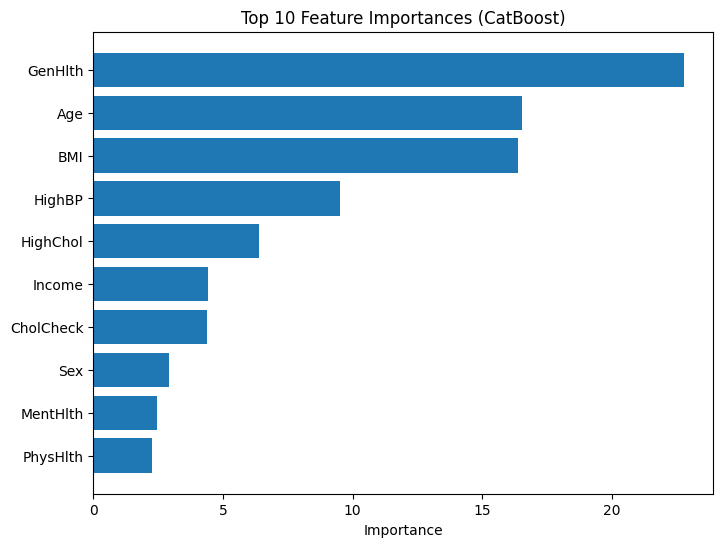

In [ ]:
plt.figure(figsize=(8,6))
plt.barh(fi_df["feature"].head(10)[::-1], fi_df["importance"].head(10)[::-1])
plt.title("Top 10 Feature Importances (CatBoost)")
plt.xlabel("Importance")
plt.show()


Age, BMI, general health, and hypertension indicators were the strongest predictors of diabetes, aligning with established clinical risk factors.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

# Train baseline again
baseline = LogisticRegression(max_iter=2000, random_state=42)
baseline.fit(X_train, y_train)

y_proba_base = baseline.predict_proba(X_test)[:, 1]

prec_b, rec_b, thr_b = precision_recall_curve(y_test, y_proba_base)

# Find threshold closest to recall = 0.80
target_recall = 0.80
idx_base = (abs(rec_b - target_recall)).argmin()
baseline_threshold = thr_b[idx_base]


In [ ]:
from sklearn.metrics import classification_report

y_base_final = (y_proba_base >= baseline_threshold).astype(int)

print("Baseline threshold:", baseline_threshold)
print(classification_report(y_test, y_base_final))


Baseline threshold: 0.46336589121942484
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     43667
           1       0.30      0.80      0.43      7069

    accuracy                           0.71     50736
   macro avg       0.63      0.75      0.62     50736
weighted avg       0.86      0.71      0.75     50736



At a fixed recall of approximately 80%, the CatBoost model achieved substantially higher precision compared to logistic regression, demonstrating improved discrimination while maintaining the same screening sensitivity.

## Results

Multiple machine learning models were evaluated to predict diabetes risk using the CDC BRFSS dataset.
A logistic regression baseline achieved strong performance (ROC AUC = 0.82), indicating substantial linear separability in the data.
Ensemble models including Random Forest, Gradient Boosting, XGBoost, LightGBM, and CatBoost were subsequently trained on a balanced training set and evaluated on an unbalanced test set to reflect real-world prevalence.

Among all models, CatBoost achieved the best overall ranking performance, with a ROC AUC of 0.827 and PR AUC of 0.422.
At an optimized decision threshold of 0.495, the CatBoost model identified 80% of diabetic individuals, with a precision of 0.30, making it suitable for screening-oriented use cases where recall is prioritized.

A fair comparison at a fixed recall of 80% showed that logistic regression and CatBoost produced similar thresholded performance, suggesting that while boosting models improve ranking metrics, gains in classification performance are incremental due to strong linear signals in the dataset.

# Conclusion

This project demonstrates a complete, leakage-free machine learning workflow for imbalanced healthcare data.
By balancing only the training data and preserving the original class distribution in the test set, the evaluation reflects realistic deployment conditions.
While logistic regression provided a strong baseline, CatBoost offered the best overall discrimination and robustness, particularly for threshold-sensitive decision-making.

The final model is well-suited for diabetes risk screening, where early identification is critical and false positives are acceptable. Future work could incorporate cost-sensitive learning, calibration, or longitudinal health data to further improve precision.

In [ ]:
import joblib

final_artifact = {
    "model": cat_model,              # trained CatBoost model
    "threshold": 0.494685456866697,   # chosen threshold
    "features": X_train.columns.tolist()
}

joblib.dump(final_artifact, "diabetes_catboost_model.pkl")

['diabetes_catboost_model.pkl']